In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pykrx import stock


In [19]:
# 분석 기간 설정
start_date = "20221017"
end_date = "20241227"

# 자산 A: KODEX 레버리지 (코스피200 레버리지 ETF)
kospiX2 = stock.get_market_ohlcv_by_date(start_date, end_date, "122630")

# 자산 B: TIGER 코스닥150 선물인버스2X (코스닥150 선물 인버스2X ETF)
kosdaqInverseX2 = stock.get_market_ohlcv_by_date(start_date, end_date, "251340")  # 종목코드 업데이트

# 종가 데이터만 사용
kospiX2 = kospiX2[['종가']]
kosdaqInverseX2 = kosdaqInverseX2[['종가']]

# 칼럼 이름 변경
kospiX2.rename(columns={'종가': 'Price_A'}, inplace=True)
kosdaqInverseX2.rename(columns={'종가': 'Price_B'}, inplace=True)

# 데이터 프레임 병합
data = kospiX2.join(kosdaqInverseX2, how='inner')

# 데이터 확인
data.head()


,Price_A,Price_B
날짜,,
2022-10-17,12475,5600
2022-10-18,12805,5450
2022-10-19,12595,5545
2022-10-20,12335,5670
2022-10-21,12385,5680


In [20]:
# 결측치 제거
data.dropna(inplace=True)

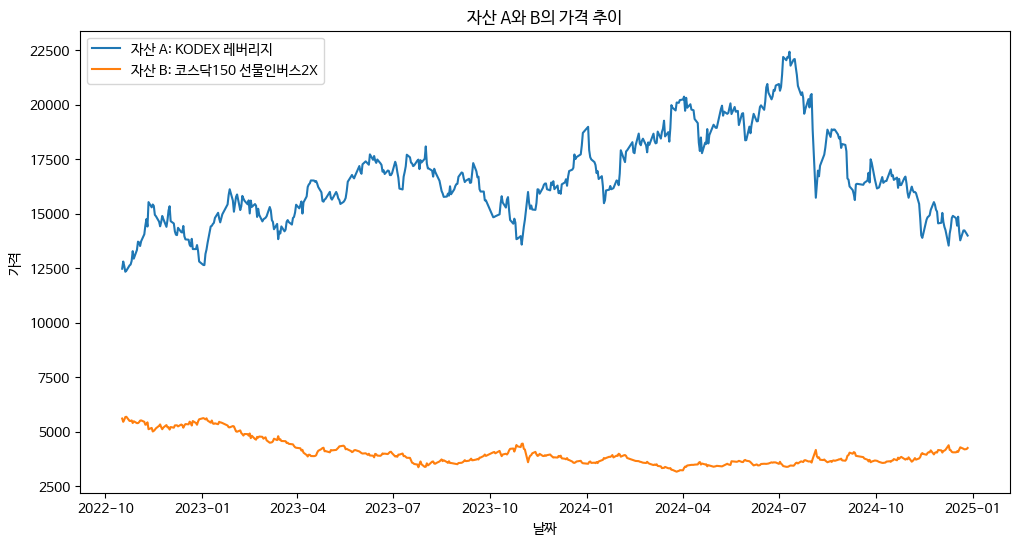

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Price_A'], label='자산 A: KODEX 레버리지')
plt.plot(data.index, data['Price_B'], label='자산 B: 코스닥150 선물인버스2X')
plt.title('자산 A와 B의 가격 추이')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.show()


In [22]:
# 자산 A의 일일 수익률
data['Return_A'] = data['Price_A'].pct_change()

# 자산 B의 일일 수익률 (이미 숏 포지션이므로 수익률에 -1을 곱하지 않음)
data['Return_B'] = data['Price_B'].pct_change()

# 결측치 제거
data.dropna(inplace=True)

# 일일 수익률 확인
data[['Return_A', 'Return_B']].head()


,Return_A,Return_B
날짜,,
2022-10-18,0.026453,-0.026786
2022-10-19,-0.016400,0.017431
2022-10-20,-0.020643,0.022543
2022-10-21,0.004054,0.001764
2022-10-24,0.019378,-0.033451


In [26]:
# 포트폴리오의 일별 수익률 (동일 비중 투자 가정)
data['Portfolio_Return'] = (data['Return_A'] + data['Return_B']) / 2

# 포트폴리오의 누적 수익률
data['Cumulative_Return'] = (1 + data['Portfolio_Return']).cumprod()

data.tail()

,Price_A,Price_B,Return_A,Return_B,Portfolio_Return,Cumulative_Return
날짜,,,,,,
2024-12-20,13775,4280,-0.028904,0.023923,-0.002490,1.017635
2024-12-23,14230,4215,0.033031,-0.015187,0.008922,1.026714
2024-12-24,14230,4185,0.000000,-0.007117,-0.003559,1.023060
2024-12-26,14080,4200,-0.010541,0.003584,-0.003478,1.019502
2024-12-27,13995,4250,-0.006037,0.011905,0.002934,1.022493


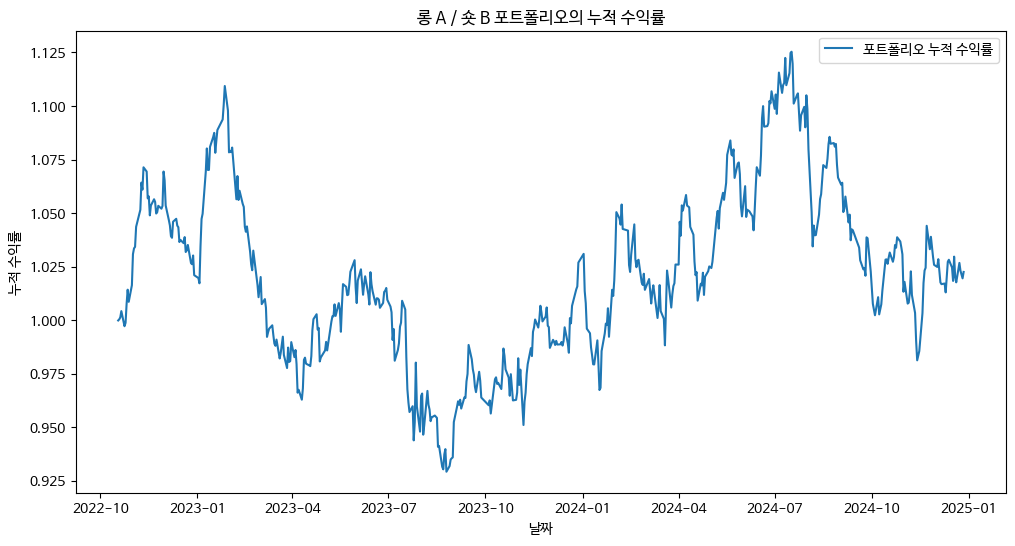

In [24]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Return'], label='포트폴리오 누적 수익률')
plt.title('롱 A / 숏 B 포트폴리오의 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.legend()
plt.show()
